# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [5]:
employees = pd.read_csv('employees.csv', index_col=0)

In [6]:
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [11]:
employees.groupby(by='Department').mean()[['Salary']]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [17]:
employees.pivot_table(index=["Department"])[['Salary']]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [20]:
grouped_employees = employees.pivot_table(index=["Department","Title"])[['Salary']]

In [21]:
grouped_employees

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [28]:
employees.pivot_table(index =['Title'], columns=['Years'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [46]:
employees_salary = employees.pivot_table(values=['Salary'], index=['Department', 'Title'], aggfunc=[np.mean, len])

In [47]:
employees_salary

mean    len
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [50]:
employees_grouped2 = employees.pivot_table(values=['Salary'], index=['Department', 'Title'], aggfunc=[np.median, min, max, np.std])

In [51]:
employees_grouped2

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In this graph we can see that in most cases, the values don't differ so much. Furthermore, in the case of HR-VP and IT-associate, since we only have one observation that falls under this category. For this reason, we cannot calculate the standard deviation of the salary in these two cases. 

#### Based on your comments, fill the missing values with an appropriate value.

In [52]:
## We will fill in the missing values with a 0, since there is not another observation with a different value
## to be able to calculate the standard deviation 

employees_grouped2 = employees_grouped2.fillna(0)

In [53]:
employees_grouped2

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [54]:
employees.pivot_table(values=['Salary'], index=['Department'], aggfunc=[np.sum, len])

,sum,len
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


In this case, we could say to the Stakeholders that the total salary spent in the HR Department is 135k€ for a total amount of 3 employees. The same applies to the other categories.

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [56]:
employees.pivot_table(values=['Salary', 'Years'], index=['Department', 'Title'], aggfunc={'Salary':np.mean,'Years':np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [59]:
def mean_calculation_2(df):
    df_sorted = df.sort_values()  #first of all, we sort all the values
    df_sorted = df_sorted[:-1]    #we remove the maximum value 
    df_mean = df_sorted.mean()    #we calculate the mean of this new df. 
    return df_mean

employees.pivot_table(values='Salary', index='Department', aggfunc=mean_calculation_2)


,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [62]:
fitbit = pd.read_csv('fitbit.csv', index_col=0)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [63]:
fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

From here we can see that there two main categories in this dataset. floats and integers. Also, we can see that we have objects that are strings. 

In [64]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [65]:
fitbit.corr(method='pearson')['Minutes Very Active']['Steps']

0.571451848106261

As we can see from the value above, there is not a clear correlation between these two variables. There is a positive correlation but it is not a strong one. 

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [66]:
import matplotlib.pyplot as plt;

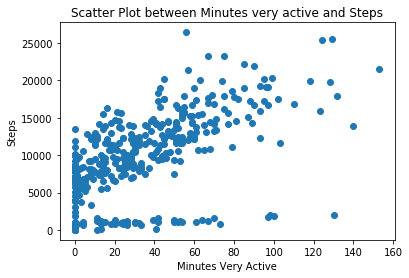

In [67]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Scatter Plot between Minutes very active and Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
In here we can see that there is a correlation of 0,57 between Minutes Very Active and Steps. However, this 
correlation factor doesn't seem to be high enough. But, taking a look at the scatter plot we can see that 
there is a range of values that could be considered as outliers or, at least, should be further analysed in 
order to notice if they should be removed from the dataset.
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [68]:
fitbit.corr(method='pearson')['Minutes Sedentary']['Steps']

0.07690608062990092

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

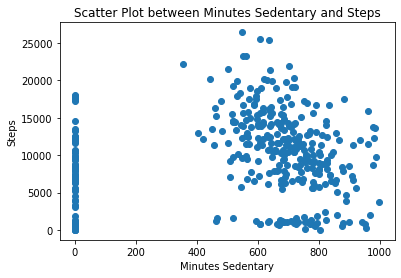

In [69]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Scatter Plot between Minutes Sedentary and Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
In this case, there are some values that are outliers and, from my point of view, should be removed.
We cannot have days with 0 Minutes Sedentary, I think that there should be some errors of the fitbit. 
By considering these outliers, the correlation factor is extremely low, and that bias the statistics analysis
here. Due to these outliers, we have a correlation factor of 0.0769. From my point of view, by removing these
values will allow us to determine whether there is a correlation between these two variables. 
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [70]:
fitbit.corr(method='pearson')['MinutesOfSleep']['Steps']

0.1309856595083637

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

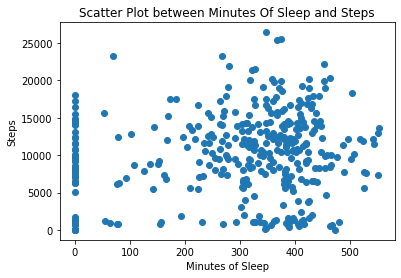

In [71]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Scatter Plot between Minutes Of Sleep and Steps')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
In this case, we also find that the correlation factor is low, 0.13. Similarly to the case before, we can see
that there are some outliers or anormal values in our dataset, considering that there are 0 minutes of sleep. 
As this cannot happen, these values should be considered as outliers and be removed from the dataset. 
However, in this case we can also see that there is not any strong correlation between these two variables. 

"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [72]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [74]:
cor_fit = fitbit[columns]
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [78]:
corr_df = cor_fit.corr(method='pearson')
corr_df

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [79]:
corr_df.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


Taking a look at the df we can see that there are some features that are more correlated than the others.
For example, considering the variable 'Steps', we can say that 'Minuted Very Active' and 'Floors' are the most correlated features

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [82]:
time_grades = pd.read_csv('time_grades.csv', index_col=0)
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

In [98]:
freq_grade = time_grades.groupby('Grade').count()[['Study time']]

freq_studytime = time_grades.groupby('Study time').count()[['Grade']]

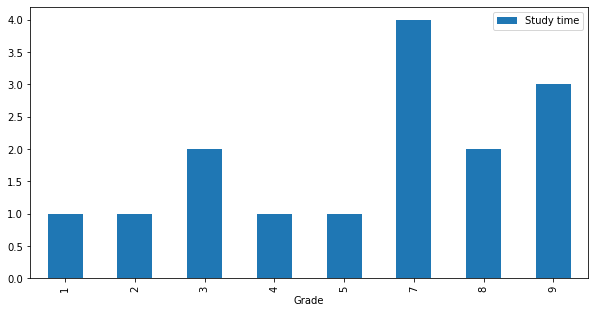

In [103]:
freq_grade.plot(kind='bar', figsize=(10,5))

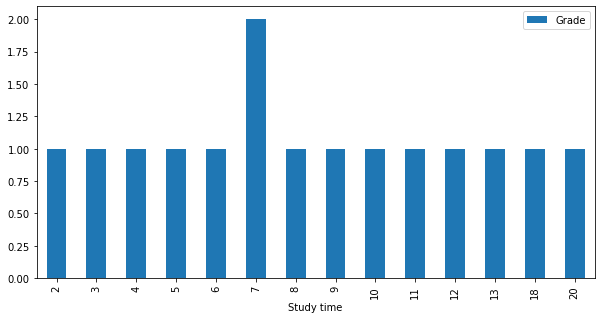

In [104]:
freq_studytime.plot(kind='bar', figsize=(10,5))

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [106]:
time_grades.corr(method='pearson') #correlation analysis using Pearson method. 

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [107]:
time_grades.corr(method='spearman') #correlation analysis using spearman method. 

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


Considering both correlation methods, the pearson method gives us  a correlation value of 0.79, significantly lower that the spearman method, where the correlation value is of 0.81969. That means that, by using this method, the correlation between Study time and grade is stronger than using pearson method. 

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

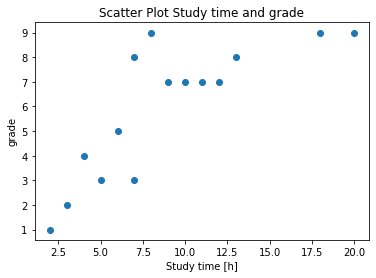

In [108]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.title('Scatter Plot Study time and grade')
plt.xlabel('Study time [h]')
plt.ylabel('grade')
plt.show()

In [ ]:
"""
In this case we cannot see a strong correlation between these two variables, since we have some points that 
are out of the expected regression line we could fit into. 
Also, we would say that we don't have enough observations to consider that this is a good correlation scatter plot. 
"""

#### Could you explain the difference between Pearson and Spearman correlations?


As can bee seen here: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/
There are some differences on computing Pearson and Spearman correlation methods.

Both methods compute the correlation and this value can vary from -1 to 1. However, if the relationship is that one variable increases when the other increases but in an amount that is not homogeneous, the spearman coefficient is one but the pearson is lower. The same happens when the relationship is when one variable increase and the other decreases but also not consistently, the Pearson coefficient is lower than being calculated under the spearman method. 


